In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
alllineup_stats = pd.read_csv("/Users/sydnee/Downloads/16th Grade/Data Science/alllineup_stats.csv")
alllineup_stats = alllineup_stats.drop(labels="Unnamed: 0", axis=1)
assists = pd.read_csv("/Users/sydnee/Downloads/16th Grade/Data Science/assists.csv")
team_stats = pd.read_csv("/Users/sydnee/Downloads/16th Grade/Data Science/team_stats.csv")

In [3]:
team_stats = team_stats.drop("Unnamed: 0", axis=1)
team_stats = team_stats.drop("G", axis=1)
team_stats

,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,48.426829,43.036585,92.487805,0.465,13.719512,37.707317,0.364,29.317073,54.780488,...,0.797,12.487805,32.182927,44.670732,26.585366,7.500000,4.500000,13.536585,18.560976,118.329268
1,BOS,48.365854,43.914634,90.195122,0.487,16.475610,42.463415,0.388,27.439024,47.731707,...,0.807,10.682927,35.646341,46.329268,26.914634,6.792683,6.560976,11.939024,16.170732,120.573171
2,BRK,48.304878,40.658537,89.109756,0.456,13.280488,36.707317,0.362,27.378049,52.402439,...,0.756,11.439024,32.621951,44.060976,25.634146,6.780488,5.170732,13.121951,18.487805,110.365854
3,CHO,48.121951,40.012195,86.987805,0.460,12.060976,34.000000,0.355,27.951220,52.987805,...,0.786,9.329268,30.951220,40.280488,24.792683,6.853659,4.524390,13.768293,17.951220,106.585366
4,CHI,48.731707,42.048780,89.500000,0.470,11.475610,32.073171,0.358,30.573171,57.426829,...,0.791,11.170732,32.646341,43.817073,24.975610,7.780488,4.804878,12.243902,18.792683,112.268293
5,CLE,48.304878,41.768293,87.170732,0.479,13.512195,36.780488,0.367,28.256098,50.390244,...,0.765,9.841463,33.439024,43.280488,28.036585,7.378049,4.634146,13.560976,17.512195,112.634146
6,DAL,48.060976,43.109756,89.658537,0.481,14.597561,39.536585,0.369,28.512195,50.121951,...,0.758,9.719512,33.219512,42.939024,25.682927,6.865854,4.951220,12.524390,18.292683,117.853659
7,DEN,48.060976,44.024390,88.768293,0.496,11.682927,31.219512,0.374,32.341463,57.548780,...,0.762,10.743902,33.695122,44.439024,29.451220,7.134146,5.573171,12.634146,18.158537,114.853659
8,DET,48.182927,40.890244,88.243902,0.463,11.048780,31.731707,0.348,29.841463,56.512195,...,0.785,10.500000,32.829268,43.329268,25.463415,6.475610,4.682927,15.219512,20.585366,109.878049
9,GSW,48.365854,43.682927,91.646341,0.477,14.768293,38.914634,0.380,28.914634,52.731707,...,0.780,12.146341,34.560976,46.707317,29.292683,6.975610,4.597561,14.317073,19.487805,117.768293


In [4]:
assists_comb = (
    assists.groupby(
        assists.apply(lambda row: tuple(sorted([row['Player 1'], row['Player 2']])), axis=1)
    )
    .agg({
        'Assists': 'sum', 
        '2pt': 'sum', 
        '3pt': 'sum', 
        'Rim': 'sum', 
        'SMR': 'sum', 
        'LMR': 'sum', 
        'C3': 'sum', 
        'AB3': 'sum',
        'Team': 'first' 
    })
    .reset_index()
)

assists_comb[['Player 1', 'Player 2']] = pd.DataFrame(assists_comb['index'].tolist(), index=assists_comb.index)
assists_comb.drop(columns=['index'], inplace=True)
assists_comb = assists_comb[['Player 1', 'Player 2', 'Team', 'Assists', '2pt', '3pt', 'Rim', 'SMR', 'LMR', 'C3', 'AB3']]
assists_comb = assists_comb.sort_values(by='Team').reset_index(drop=True)

In [5]:
assists_duos = set(tuple(sorted([row['Player 1'], row['Player 2']])) for _, row in assists_comb.iterrows())
alllineup_duos = set(tuple(sorted([row['Player 1'], row['Player 2']])) for _, row in alllineup_stats.iterrows())
missing_duos = assists_duos - alllineup_duos
missing_duos
assists_comb = assists_comb[
    ~assists_comb.apply(lambda row: tuple(sorted([row['Player 1'], row['Player 2']])) in missing_duos, axis=1)
].reset_index(drop=True)

display(assists_comb)


,Player 1,Player 2,Team,Assists,2pt,3pt,Rim,SMR,LMR,C3,AB3
0,O. Okongwu,S. Bey,ATL,18,9,9,9,0,0,6,3.0
1,D. Murray,S. Bey,ATL,83,39,44,22,14,3,17,27.0
2,D. Murray,J. Johnson,ATL,102,60,42,40,16,4,9,33.0
3,J. Johnson,T. Young,ATL,128,102,26,70,29,3,4,22.0
4,D. Hunter,D. Murray,ATL,115,62,53,31,22,9,19,34.0
...,...,...,...,...,...,...,...,...,...,...,...
591,D. Avdija,K. Kuzma,WAS,98,75,23,58,13,4,13,10.0
592,D. Avdija,J. Poole,WAS,89,63,26,42,17,4,6,20.0
593,J. Poole,K. Kuzma,WAS,102,58,44,38,13,7,15,29.0
594,K. Kuzma,Tyus Jones,WAS,229,136,93,79,42,15,32,61.0


In [6]:
# sort by minutes played
alllineup_stats['MP'] = alllineup_stats['MP'].str.replace(':00$', '', regex=True)

alllineup_stats['Minutes'] = alllineup_stats['MP'].str.split(':').str[0]
alllineup_stats['Seconds'] = alllineup_stats['MP'].str.split(':').str[1]
alllineup_stats['Minutes'] = pd.to_numeric(alllineup_stats['Minutes'], errors='coerce')
alllineup_stats['Seconds'] = pd.to_numeric(alllineup_stats['Seconds'], errors='coerce')
alllineup_stats['Seconds'] = alllineup_stats['Seconds'].fillna(0).astype(int)

alllineup_stats_sorted = alllineup_stats.sort_values(by=['Minutes', 'Seconds'], ascending=[False, False])
display(alllineup_stats_sorted[['Player 1', 'Player 2', 'Team','MP', 'ORTG2', 'DRTG2']].head(15))

,Player 1,Player 2,Team,MP,ORTG2,DRTG2
496,K. Murray,D. Sabonis,SAC,2245:10,122.366196,113.853522
79,D. DeRozan,C. White,CHI,2213:11,118.664704,118.952942
139,K. Caldwell-Pope,N. Jokic,DEN,2176:18,127.108578,110.269996
140,N. Jokic,M. Porter,DEN,2118:05,124.889998,110.618572
497,H. Barnes,D. Sabonis,SAC,2115:14,124.673358,115.257299
80,N. Vucevic,C. White,CHI,2113:07,114.478109,117.390547
456,G. Allen,K. Durant,PHO,2044:35,122.292598,115.073149
259,A. Davis,A. Reaves,LAL,1995:14,121.719291,113.105276
81,D. DeRozan,N. Vucevic,CHI,1991:57,118.013135,116.504926
141,A. Gordon,N. Jokic,DEN,1990:12,128.589801,110.410199


In [7]:
alllineup_stats['Combo'] = alllineup_stats.apply(lambda row: tuple(sorted([row['Player 1'], row['Player 2']])), axis=1)
assists_comb['Combo'] = assists_comb.apply(lambda row: tuple(sorted([row['Player 1'], row['Player 2']])), axis=1)

alllineup_stats = pd.merge(alllineup_stats, assists_comb[['Combo', 'Assists']], on='Combo', how='left')
# alllineup.drop(columns=['Unnamed: 0', 'Dist._diff', '0-3_x_diff', '3-10_x_diff', '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Minutes', 'Seconds', 'Combo'], inplace=True)
display(alllineup_stats)

,Player 1,Player 2,Team,MP,PTS,FG,FGA,FG%,3P,3PA,...,0-3_x_diff,3-10_x_diff,10-16_x_diff,16-3P_x_diff,3P_x_diff,USG%_diff,Minutes,Seconds,Combo,Assists
0,C. Capela,D. Murray,ATL,1771:30,-1.1,-0.7,5.0,-0.033,-0.1,-0.021,...,0.523,0.100,0.170,0.076,0.377,3.701687,1771,30,"(C. Capela, D. Murray)",90
1,S. Bey,D. Murray,ATL,1594:50,-4.1,-2.8,2.0,-0.041,-1.5,-0.048,...,0.117,0.036,0.148,0.068,0.135,10.914911,1594,50,"(D. Murray, S. Bey)",83
2,Bogdan Bogdanovic,D. Murray,ATL,1427:54,1.4,0.1,4.5,-0.023,-0.7,-0.016,...,0.047,0.043,0.086,0.028,0.204,0.660310,1427,54,"(Bogdan Bogdanovic, D. Murray)",115
3,D. Hunter,D. Murray,ATL,1413:14,-1.5,-1.4,1.5,-0.024,0.1,-0.001,...,0.004,0.042,0.044,0.010,0.080,2.252758,1413,14,"(D. Hunter, D. Murray)",115
4,J. Johnson,D. Murray,ATL,1262:33,-3.8,-2.4,0.6,-0.029,-2.6,-0.044,...,0.172,0.081,0.098,0.060,0.094,8.616759,1262,33,"(D. Murray, J. Johnson)",102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,D. Avdija,D. Gafford,WAS,771:47,-5.4,-0.2,-3.2,0.015,-2.4,-0.032,...,0.297,0.022,0.003,0.023,0.293,6.926140,771,47,"(D. Avdija, D. Gafford)",38
592,B. Coulibaly,J. Poole,WAS,718:57,-19.8,-8.3,-4.1,-0.071,0.5,-0.043,...,0.157,0.008,0.081,0.036,0.048,16.519254,718,57,"(B. Coulibaly, J. Poole)",21
593,D. Avdija,B. Coulibaly,WAS,694:40,-12.1,-5.7,-4.6,-0.039,1.5,-0.001,...,0.023,0.110,0.009,0.007,0.135,6.940771,694,40,"(B. Coulibaly, D. Avdija)",28
594,Tyus Jones,C. Kispert,WAS,607:29,-15.0,-6.0,-4.3,-0.042,0.0,-0.017,...,0.089,0.148,0.136,0.024,0.221,9.423601,607,29,"(C. Kispert, Tyus Jones)",70


In [8]:
minutes = alllineup_stats['MP'].str.split(':').str[0].astype(float) 
seconds = alllineup_stats['MP'].str.split(':').str[1].astype(float)

decimal_minutes = minutes + (seconds / 60)
alllineup_stats['MP_decimal'] = decimal_minutes
alllineup_stats['APM'] = alllineup_stats['Assists'] / alllineup_stats['MP_decimal']
alllineup_stats.drop(columns=['MP_decimal'], inplace=True)

alllineup_stats = alllineup_stats.sort_values(by=['APM'], ascending=False)
display(alllineup_stats[['Player 1', 'Player 2', 'Team','MP', 'ORTG2', 'DRTG2', 'APM']].head(15))

,Player 1,Player 2,Team,MP,ORTG2,DRTG2,APM
145,N. Jokic,J. Murray,DEN,1405:35,124.867773,111.066113,0.185688
441,J. Embiid,T. Maxey,PHI,958:25,122.836440,112.102825,0.180506
327,G. Antetokounmpo,K. Middleton,MIL,1042:23,120.662387,113.940950,0.169803
504,M. Monk,D. Sabonis,SAC,1140:00,118.381082,115.078185,0.169298
16,Bogdan Bogdanovic,T. Young,ATL,915:10,116.536568,121.073137,0.158441
150,R. Jackson,N. Jokic,DEN,1029:56,119.201557,112.826636,0.153408
219,T. Haliburton,M. Turner,IND,1581:08,124.210490,116.871329,0.147363
261,A. Davis,L. James,LAL,1726:29,121.902306,111.622118,0.139590
181,S. Curry,D. Green,GSW,1288:16,117.887287,115.145478,0.135065
204,A. Sengun,F. VanVleet,HOU,1675:59,119.963045,112.177827,0.133056


In [9]:
numeric_cols = alllineup_stats.select_dtypes(include=['number']).columns
scaler = StandardScaler()
alllineup_stats[numeric_cols] = scaler.fit_transform(alllineup_stats[numeric_cols])

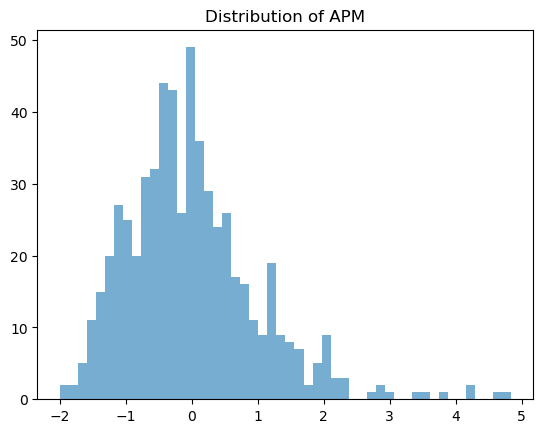

In [10]:
plt.hist(alllineup_stats["APM"], bins=50, alpha=0.6)
plt.title("Distribution of APM")
plt.show()

In [11]:
team_stats

,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,ATL,48.426829,43.036585,92.487805,0.465,13.719512,37.707317,0.364,29.317073,54.780488,...,0.797,12.487805,32.182927,44.670732,26.585366,7.500000,4.500000,13.536585,18.560976,118.329268
1,BOS,48.365854,43.914634,90.195122,0.487,16.475610,42.463415,0.388,27.439024,47.731707,...,0.807,10.682927,35.646341,46.329268,26.914634,6.792683,6.560976,11.939024,16.170732,120.573171
2,BRK,48.304878,40.658537,89.109756,0.456,13.280488,36.707317,0.362,27.378049,52.402439,...,0.756,11.439024,32.621951,44.060976,25.634146,6.780488,5.170732,13.121951,18.487805,110.365854
3,CHO,48.121951,40.012195,86.987805,0.460,12.060976,34.000000,0.355,27.951220,52.987805,...,0.786,9.329268,30.951220,40.280488,24.792683,6.853659,4.524390,13.768293,17.951220,106.585366
4,CHI,48.731707,42.048780,89.500000,0.470,11.475610,32.073171,0.358,30.573171,57.426829,...,0.791,11.170732,32.646341,43.817073,24.975610,7.780488,4.804878,12.243902,18.792683,112.268293
5,CLE,48.304878,41.768293,87.170732,0.479,13.512195,36.780488,0.367,28.256098,50.390244,...,0.765,9.841463,33.439024,43.280488,28.036585,7.378049,4.634146,13.560976,17.512195,112.634146
6,DAL,48.060976,43.109756,89.658537,0.481,14.597561,39.536585,0.369,28.512195,50.121951,...,0.758,9.719512,33.219512,42.939024,25.682927,6.865854,4.951220,12.524390,18.292683,117.853659
7,DEN,48.060976,44.024390,88.768293,0.496,11.682927,31.219512,0.374,32.341463,57.548780,...,0.762,10.743902,33.695122,44.439024,29.451220,7.134146,5.573171,12.634146,18.158537,114.853659
8,DET,48.182927,40.890244,88.243902,0.463,11.048780,31.731707,0.348,29.841463,56.512195,...,0.785,10.500000,32.829268,43.329268,25.463415,6.475610,4.682927,15.219512,20.585366,109.878049
9,GSW,48.365854,43.682927,91.646341,0.477,14.768293,38.914634,0.380,28.914634,52.731707,...,0.780,12.146341,34.560976,46.707317,29.292683,6.975610,4.597561,14.317073,19.487805,117.768293


In [12]:
normalized = team_stats[["Team", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT", 
                         "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]].copy()

numeric_cols = normalized.select_dtypes(include=['float', 'int']).columns
normalized[numeric_cols] = normalized[numeric_cols].transform(lambda x: (x - x.mean()) / x.std())
normalized = normalized.fillna(0)
display(normalized.nlargest(30, "PTS"))

,Team,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
11,IND,-1.363481,2.798046,1.825514,1.933557,0.295502,0.052983,0.593847,2.669291,1.440194,...,-0.082972,-0.407797,-1.248163,-1.385265,2.203661,0.398708,0.919356,-0.655745,2.057455,2.134447
1,BOS,0.603078,1.008011,0.625969,0.750953,3.002313,2.558005,1.591509,-1.127733,-2.417381,...,0.971753,0.112569,2.142516,1.914580,0.131562,-1.231370,1.802061,-1.582593,-1.960282,1.495260
20,OKC,0.209766,1.374475,0.200515,1.460515,0.376002,-0.311538,1.662771,1.144673,0.521955,...,1.731154,-1.522868,0.196561,-1.033505,0.236811,1.786477,1.802061,-0.887457,0.085961,1.380607
16,MIL,0.209766,0.564026,-0.189485,0.750953,1.110564,1.032103,0.522585,-0.220223,-1.338815,...,-0.420483,-0.991882,1.425068,0.432162,-0.072359,-1.209342,-0.133696,-0.655745,0.356925,1.119773
0,ATL,0.996390,0.500599,1.736877,-0.549911,0.728189,0.904945,-0.118769,-0.009680,0.390778,...,0.549863,1.684288,-0.648652,0.775547,-0.046047,0.046259,-0.815083,-0.064879,-0.128941,0.967858
13,LAL,0.996390,0.860016,-0.668121,1.460515,-0.841560,-1.299136,0.807632,1.493157,0.939778,...,-0.082972,-2.011375,1.513521,-0.296484,1.006448,-0.174022,0.485746,0.352202,-2.362056,0.899067
6,DAL,-1.363481,0.542883,0.365969,0.396172,1.452689,1.540737,0.237539,-0.488846,-1.465133,...,-1.095507,-0.726389,0.186733,-0.413737,-0.532826,-1.099201,-0.242099,-1.026484,-0.334500,0.856072
9,GSW,0.603078,0.874110,1.329150,0.159651,1.593564,1.324568,1.021416,-0.249263,-0.425434,...,-0.167350,1.386936,1.267819,2.174213,1.414290,-0.900948,-0.691195,0.676599,0.581170,0.836008
25,SAC,0.996390,0.669736,0.974605,0.159651,1.261502,1.443249,0.023754,-0.220223,-0.852974,...,-1.643963,0.240006,0.137593,0.306534,0.901199,0.266540,-1.233207,-0.435619,0.898852,0.552243
23,PHO,-0.183546,0.169372,-1.341757,1.105734,-0.328373,-0.879513,1.163940,0.411405,-0.095063,...,1.013942,-0.365318,0.766588,0.365161,0.203921,-0.063881,1.089703,1.221123,-0.568089,0.477719


In [13]:
# Normalize by Team Strength (Relative Adjustment)

normalized = alllineup_stats[["Player 1", "Player 2", "Team", "MP", "PTS", "FG", "FGA", "FG%", 
                              "3P", "3PA", "eFG%", "FT", "FTA", "FT%", "DRB", "DRB%", "ORB", "ORB%", 
                              "TRB", "TRB%", "AST", "STL", "BLK", "TOV", "PF"]].copy()


numeric_cols = normalized.select_dtypes(include=['float', 'int']).columns
normalized[numeric_cols] = normalized.groupby("Team")[numeric_cols].transform(lambda x: (x - x.mean()) / x.std())
normalized = normalized.fillna(0)
display(normalized.nlargest(15, "PTS"))

,Player 1,Player 2,Team,MP,PTS,FG,FGA,FG%,3P,3PA,...,DRB%,ORB,ORB%,TRB,TRB%,AST,STL,BLK,TOV,PF
431,C. Anthony,J. Isaac,ORL,713:36,2.824018,2.822026,0.698309,2.740694,-0.474521,0.583841,...,1.461461,0.186876,1.461461,2.337557,2.305162,1.794651,1.921358,1.673461,-1.179727,1.398472
213,Amen Thompson,F. VanVleet,HOU,629:03,2.770898,2.234867,1.730150,1.156536,2.109237,1.437628,...,2.136924,1.853194,2.136924,2.262894,2.227826,1.807111,1.665606,0.940748,-1.934755,0.438299
352,N. Alexander-Walker,R. Gobert,MIN,1064:49,2.359379,2.086202,-0.413902,2.283041,0.990615,1.161750,...,0.251717,-0.223093,0.251717,0.866157,0.882553,2.496227,-1.022619,0.281414,-0.368042,0.037039
450,N. Batum,J. Embiid,PHI,633:13,2.196380,2.223234,-1.461664,2.431530,1.728936,2.667093,...,0.165788,-0.953260,0.165788,1.757011,1.753296,2.436085,-0.255128,1.440222,1.044021,-1.208645
314,J. Jaquez,K. Love,MIA,641:00,2.159120,2.056501,1.306656,1.213535,1.748707,0.327059,...,2.103945,2.037210,2.103945,1.839436,1.844191,1.326777,-1.725970,-2.022595,-0.657348,-0.947097
76,G. Hayward,B. Miller,CHO,517:20,2.067361,2.263759,0.858422,1.245242,1.629579,1.643717,...,1.333039,0.954014,1.333039,2.032292,2.028191,2.174456,0.651789,0.823767,0.807020,2.023934
195,D. Green,J. Kuminga,GSW,687:10,2.065457,2.439110,1.553694,2.173072,0.642677,1.884688,...,-0.442193,-0.705121,-0.442193,0.277979,0.246503,2.031764,0.915709,-0.493799,-1.338465,0.471816
91,A. Drummond,C. White,CHI,809:50,2.062996,2.599547,0.926411,1.551151,-0.752746,0.130924,...,1.797627,1.397161,1.797627,2.105368,2.098993,-0.285898,0.126456,-1.237093,0.671797,-2.186380
98,A. Caruso,A. Drummond,CHI,627:49,2.014341,1.233611,0.871916,0.463746,-1.042263,0.130924,...,1.580936,1.472581,1.580936,1.606564,1.655153,-0.088727,0.307107,0.824729,-1.215897,-1.810713
369,H. Jones,T. Murphy,NOP,915:25,1.969400,0.068533,-0.292865,0.201674,1.331291,1.548488,...,-0.887654,-1.105194,-0.887654,-0.498285,-0.477972,-0.077198,1.843923,-0.355822,-1.695993,-0.730881


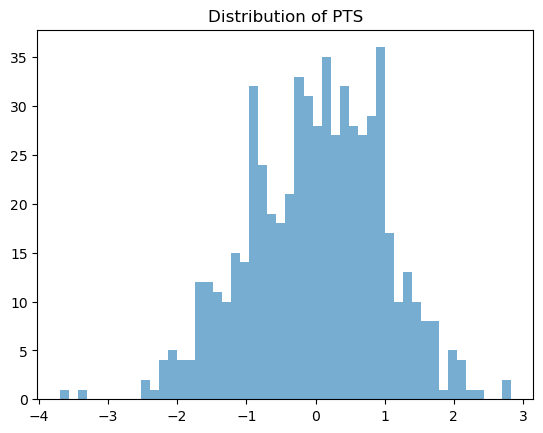

In [14]:
plt.hist(normalized["PTS"], bins=50, alpha=0.6)
plt.title("Distribution of PTS")
plt.show()

In [15]:
alllineup_stats1 = alllineup_stats.copy()
alllineup_stats1[numeric_cols] = normalized[numeric_cols]
alllineup_stats1[alllineup_stats1["Team"] == "DEN"]

,Player 1,Player 2,Team,MP,PTS,FG,FGA,FG%,3P,3PA,...,3-10_x_diff,10-16_x_diff,16-3P_x_diff,3P_x_diff,USG%_diff,Minutes,Seconds,Combo,Assists,APM
145,N. Jokic,J. Murray,DEN,1405:35,1.278952,1.337014,0.129164,1.209257,0.690639,1.100418,...,1.917984,-0.302052,1.134033,-0.302074,-1.056518,1.038432,0.252052,"(J. Murray, N. Jokic)",4.844044,4.837110
150,R. Jackson,N. Jokic,DEN,1029:56,-0.198358,-0.522622,-0.405308,-0.172751,-0.157514,0.136045,...,0.821573,-0.763606,-0.098872,-0.116979,-0.405882,0.061814,1.444298,"(N. Jokic, R. Jackson)",2.329766,3.591743
157,N. Jokic,P. Watson,DEN,637:11,0.083825,-0.073744,-2.320500,1.554760,2.023450,2.581419,...,1.410894,-0.763606,-0.425969,-0.339093,-1.182254,-0.956362,-1.110515,"(N. Jokic, P. Watson)",0.084003,1.669408
140,N. Jokic,M. Porter,DEN,2118:05,0.598393,0.759886,0.930873,0.115167,0.205980,-0.036164,...,2.945870,-0.615249,0.756613,0.728291,-0.002722,2.890370,-1.451157,"(M. Porter, N. Jokic)",3.330595,1.297959
156,C. Braun,N. Jokic,DEN,779:53,1.295551,1.850017,-0.138072,1.957845,0.569474,1.307069,...,0.602290,0.291376,-0.576937,-0.339093,-0.844253,-0.587533,1.273977,"(C. Braun, N. Jokic)",0.254876,1.284490
141,A. Gordon,N. Jokic,DEN,1990:12,0.565195,0.311008,0.975412,-0.403086,-0.157514,-0.311699,...,1.698702,-0.170179,-0.224679,-1.246061,0.598486,2.557904,-1.053741,"(A. Gordon, N. Jokic)",3.013259,1.278865
139,K. Caldwell-Pope,N. Jokic,DEN,2176:18,0.764383,0.759886,0.218243,0.575837,0.569474,0.480464,...,3.041806,-0.763606,0.454677,0.802329,1.716226,3.041018,-0.713100,"(K. Caldwell-Pope, N. Jokic)",2.793565,0.810995
158,J. Murray,P. Watson,DEN,634:06,-1.227495,-0.907374,-2.454118,0.806172,1.659956,0.618232,...,-0.823044,0.126535,1.939195,-1.387968,-1.193856,-0.964154,-1.394383,"(J. Murray, P. Watson)",-0.428617,0.411152
147,A. Gordon,J. Murray,DEN,1265:08,0.664789,0.759886,0.530018,0.345502,-0.521008,0.204929,...,-1.110852,0.719962,2.140486,-0.481000,0.861559,0.674798,-1.280836,"(A. Gordon, J. Murray)",0.376929,0.051850
146,J. Murray,M. Porter,DEN,1390:20,0.731185,0.888137,0.663636,0.345502,-0.399844,-0.105048,...,-0.302249,0.274892,-0.853712,-0.394622,0.260351,0.999471,-0.599552,"(J. Murray, M. Porter)",0.425750,-0.106846


In [16]:
alllineup_stats1 = alllineup_stats1.drop(["Minutes", "Seconds", "Combo"], axis=1)
alllineup_stats1

,Player 1,Player 2,Team,MP,PTS,FG,FGA,FG%,3P,3PA,...,DRTG2,Dist._diff,0-3_x_diff,3-10_x_diff,10-16_x_diff,16-3P_x_diff,3P_x_diff,USG%_diff,Assists,APM
145,N. Jokic,J. Murray,DEN,1405:35,1.278952,1.337014,0.129164,1.209257,0.690639,1.100418,...,-1.289964,0.078568,-0.416717,1.917984,-0.302052,1.134033,-0.302074,-1.056518,4.844044,4.837110
441,J. Embiid,T. Maxey,PHI,958:25,0.901887,-0.073495,-1.369445,1.244420,0.707624,1.228412,...,-0.980562,-0.693985,-1.039911,-0.781929,1.296905,1.888872,0.043437,1.629631,2.695923,4.637189
327,G. Antetokounmpo,K. Middleton,MIL,1042:23,1.678272,1.879583,0.027273,1.626362,-0.112117,0.800974,...,-0.431984,1.200016,1.778011,-0.069262,0.769414,1.234678,0.382779,-0.960687,2.793565,4.224271
504,M. Monk,D. Sabonis,SAC,1140:00,-1.105790,-0.575842,-0.152325,-0.586058,-1.113025,-0.984459,...,-0.092582,1.200016,0.883863,1.027150,-0.565797,-0.526615,0.999764,1.205672,3.184132,4.204791
16,Bogdan Bogdanovic,T. Young,ATL,915:10,0.973836,0.413808,0.176809,0.347434,1.736827,1.132813,...,1.696579,-1.092721,-1.039911,-0.768224,-0.170179,-0.828551,-0.696945,-0.549126,2.012430,3.785921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,H. Barnes,K. Murray,SAC,1741:17,-0.004686,-0.088357,0.341703,-0.249565,-0.338747,0.033342,...,0.631948,-0.943195,-0.762183,-0.315954,-0.203147,0.228225,-1.412647,-1.291096,-0.843594,-1.706380
354,R. Gobert,N. Reid,MIN,918:35,0.903215,0.927201,-0.413902,1.040570,-0.590154,-0.446827,...,-2.790587,1.648595,2.638290,-0.288544,-1.076804,-0.929196,1.499522,2.131069,-1.234162,-1.822756
46,N. Claxton,D. Finney-Smith,BRK,1058:10,0.933376,0.806154,0.496250,0.812966,0.188569,0.291700,...,-0.466783,2.196858,1.459640,1.972805,-0.565797,-1.205970,2.579246,-0.921294,-1.209751,-1.852779
296,B. Biyombo,J. Jackson,MEM,430:13,1.131146,1.583415,0.862904,1.660986,-0.903858,0.375698,...,-0.617590,0.751437,0.748386,0.232252,-0.236115,-1.029841,0.518516,2.085827,-1.405035,-1.878371


In [17]:
merged_df = pd.merge(alllineup_stats1, team_stats, on=['Team'], suffixes=('', '_Team'))

merged_df['PIE'] = (
    (merged_df['PTS'] + merged_df['FG'] + merged_df['FT'] - merged_df['FGA'] - merged_df['FTA'] 
     + merged_df['DRB'] + merged_df['ORB'] / 2 + merged_df['AST'] 
     + merged_df['STL'] + merged_df['BLK'] / 2 - merged_df['PF'] - merged_df['TOV']) 
    / 
    (merged_df['PTS_Team'] + merged_df['FG_Team'] + merged_df['FT_Team'] - merged_df['FGA_Team'] 
     - merged_df['FTA_Team'] + merged_df['DRB_Team'] + merged_df['ORB_Team'] / 2 
     + merged_df['AST_Team'] + merged_df['STL_Team'] + merged_df['BLK_Team'] / 2 
     - merged_df['PF_Team'] - merged_df['TOV_Team'])
)

alllineup_stats1['PIE'] = merged_df['PIE']
alllineup_stats1

,Player 1,Player 2,Team,MP,PTS,FG,FGA,FG%,3P,3PA,...,Dist._diff,0-3_x_diff,3-10_x_diff,10-16_x_diff,16-3P_x_diff,3P_x_diff,USG%_diff,Assists,APM,PIE
145,N. Jokic,J. Murray,DEN,1405:35,1.278952,1.337014,0.129164,1.209257,0.690639,1.100418,...,0.078568,-0.416717,1.917984,-0.302052,1.134033,-0.302074,-1.056518,4.844044,4.837110,0.042674
441,J. Embiid,T. Maxey,PHI,958:25,0.901887,-0.073495,-1.369445,1.244420,0.707624,1.228412,...,-0.693985,-1.039911,-0.781929,1.296905,1.888872,0.043437,1.629631,2.695923,4.637189,-0.008927
327,G. Antetokounmpo,K. Middleton,MIL,1042:23,1.678272,1.879583,0.027273,1.626362,-0.112117,0.800974,...,1.200016,1.778011,-0.069262,0.769414,1.234678,0.382779,-0.960687,2.793565,4.224271,0.044048
504,M. Monk,D. Sabonis,SAC,1140:00,-1.105790,-0.575842,-0.152325,-0.586058,-1.113025,-0.984459,...,1.200016,0.883863,1.027150,-0.565797,-0.526615,0.999764,1.205672,3.184132,4.204791,0.024751
16,Bogdan Bogdanovic,T. Young,ATL,915:10,0.973836,0.413808,0.176809,0.347434,1.736827,1.132813,...,-1.092721,-1.039911,-0.768224,-0.170179,-0.828551,-0.696945,-0.549126,2.012430,3.785921,0.098196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,H. Barnes,K. Murray,SAC,1741:17,-0.004686,-0.088357,0.341703,-0.249565,-0.338747,0.033342,...,-0.943195,-0.762183,-0.315954,-0.203147,0.228225,-1.412647,-1.291096,-0.843594,-1.706380,-0.024738
354,R. Gobert,N. Reid,MIN,918:35,0.903215,0.927201,-0.413902,1.040570,-0.590154,-0.446827,...,1.648595,2.638290,-0.288544,-1.076804,-0.929196,1.499522,2.131069,-1.234162,-1.822756,0.026807
46,N. Claxton,D. Finney-Smith,BRK,1058:10,0.933376,0.806154,0.496250,0.812966,0.188569,0.291700,...,2.196858,1.459640,1.972805,-0.565797,-1.205970,2.579246,-0.921294,-1.209751,-1.852779,0.003916
296,B. Biyombo,J. Jackson,MEM,430:13,1.131146,1.583415,0.862904,1.660986,-0.903858,0.375698,...,0.751437,0.748386,0.232252,-0.236115,-1.029841,0.518516,2.085827,-1.405035,-1.878371,0.020358


In [18]:
from sklearn.preprocessing import MinMaxScaler

stats_columns = alllineup_stats1.select_dtypes(include='number').columns
scaler = MinMaxScaler(feature_range=(0, 4))
alllineup_stats1[stats_columns] = scaler.fit_transform(alllineup_stats1[stats_columns]) - 2

In [19]:
alllineup_stats1["DRTG2"] = alllineup_stats1["DRTG2"]*-1

In [20]:
display(alllineup_stats1[["Player 1", "Player 2", "Team", "ORTG2", "DRTG2", "APM", "PIE"]].nlargest(15, "APM"))

,Player 1,Player 2,Team,ORTG2,DRTG2,APM,PIE
145,N. Jokic,J. Murray,DEN,0.282450,0.880272,2.000000,0.800066
441,J. Embiid,T. Maxey,PHI,0.082828,0.649405,1.882930,0.082632
327,G. Antetokounmpo,K. Middleton,MIL,-0.130819,0.240069,1.641135,0.819169
504,M. Monk,D. Sabonis,SAC,-0.355005,-0.013184,1.629727,0.550869
16,Bogdan Bogdanovic,T. Young,ATL,-0.536268,-1.348211,1.384446,1.572007
150,R. Jackson,N. Jokic,DEN,-0.274376,0.488218,1.270740,0.168568
219,T. Haliburton,M. Turner,IND,0.217858,-0.412502,1.134166,0.971781
261,A. Davis,L. James,LAL,-0.008970,0.756455,0.958571,0.310337
181,S. Curry,D. Green,GSW,-0.403531,-0.028169,0.856346,0.211505
204,A. Sengun,F. VanVleet,HOU,-0.199544,0.632703,0.810960,-0.511782


Selected Features for Best APM Correlation:
Index(['PTS', 'FG', 'FGA', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%', 'DRB',
       'ORB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'ORTG2', 'DRTG2', 'Dist._diff',
       '0-3_x_diff', '3-10_x_diff', '16-3P_x_diff', 'USG%_diff', 'Assists',
       'PIE'],
      dtype='object')


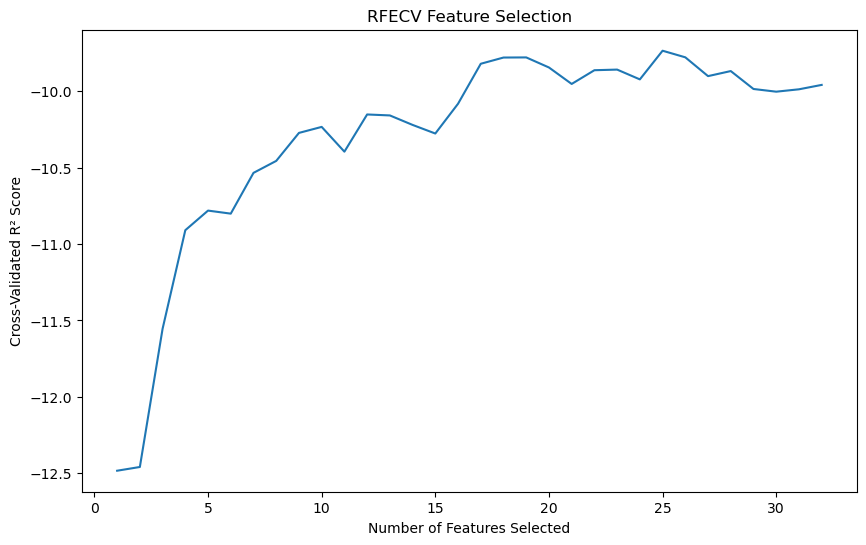

In [21]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define features (exclude APM itself to avoid leakage)
X = alllineup_stats1.select_dtypes(include=['number']).drop(columns=['APM'])
y = alllineup_stats1.select_dtypes(include=['number'])['APM']

# Initialize the model and RFECV
model = RandomForestRegressor(random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

# Fit RFECV to find the best combination of features
rfecv.fit(X, y)

# Get the selected features
selected_features = X.columns[rfecv.support_]

print("Selected Features for Best APM Correlation:")
print(selected_features)

# Plot the number of features vs. cross-validated R-squared score
plt.figure(figsize=(10, 6))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated R² Score")
plt.title("RFECV Feature Selection")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()


Selected Features for Best APM Correlation:
Index(['FGA', '3PA', 'FTA', 'FT%', 'DRB', 'ORB%', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'ORTG2', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
       '10-16_x_diff', '16-3P_x_diff', 'USG%_diff', 'Assists', 'APM'],
      dtype='object')


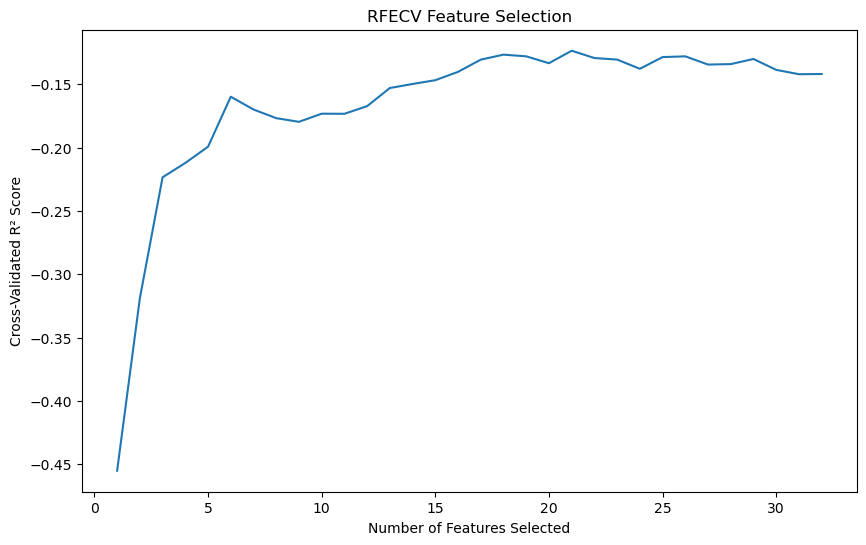

In [22]:
# Define features (exclude APM itself to avoid leakage)
X = alllineup_stats1.select_dtypes(include=['number']).drop(columns=['PIE'])
y = alllineup_stats1.select_dtypes(include=['number'])['PIE']

# Initialize the model and RFECV
model = RandomForestRegressor(random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

# Fit RFECV to find the best combination of features
rfecv.fit(X, y)

# Get the selected features
selected_features = X.columns[rfecv.support_]

print("Selected Features for Best APM Correlation:")
print(selected_features)

# Plot the number of features vs. cross-validated R-squared score
plt.figure(figsize=(10, 6))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated R² Score")
plt.title("RFECV Feature Selection")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

Selected Features for Best ORTG2 Correlation:
Index(['PTS', 'FG%', 'eFG%', 'FT', 'FTA', 'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB%',
       'TOV', 'DRTG2', '0-3_x_diff', '3P_x_diff', 'Assists'],
      dtype='object')


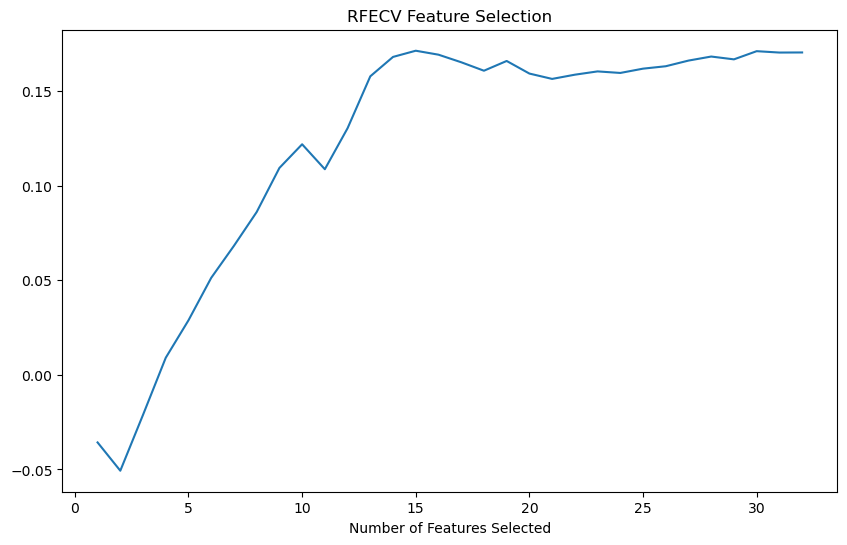

In [23]:
# Define features (exclude APM itself to avoid leakage)
X = alllineup_stats1.select_dtypes(include=['number']).drop(columns=['ORTG2'])
y = alllineup_stats1.select_dtypes(include=['number'])['ORTG2']

# Initialize the model and RFECV
model = SVR(kernel='linear')
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

# Fit RFECV to find the best combination of features
rfecv.fit(X, y)

# Get the selected features
selected_features = X.columns[rfecv.support_]

print("Selected Features for Best ORTG2 Correlation:")
print(selected_features)

# Plot the number of features vs. cross-validated R-squared score
plt.figure(figsize=(10, 6))
plt.xlabel("Number of Features Selected")
# plt.ylabel("Cross-Validated R² Score")
plt.title("RFECV Feature Selection")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

def model_pred_ortg_drtg(X, y, target_columns):
    
    models = {
        "Linear Regression": LinearRegression(),
        "Regression Tree": DecisionTreeRegressor(),
        "Random Forest Regression": RandomForestRegressor(max_depth=25, random_state=0),
        "XGBoost Regression": XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123),
        # "Lasso Regression": Lasso(alpha=0.01)
    }
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    mae_train = {target: {} for target in target_columns}
    mae_test = {target: {} for target in target_columns}
    r2_train = {target: {} for target in target_columns}
    r2_test = {target: {} for target in target_columns}
    
    for target in target_columns:
        for model_name, model in models.items():
            reg = model.fit(X_train, y_train[target])
            y_train_pred = reg.predict(X_train)
            y_test_pred = reg.predict(X_test)

            mae_train[target][model_name] = mean_absolute_error(y_train[target], y_train_pred)
            mae_test[target][model_name] = mean_absolute_error(y_test[target], y_test_pred)
            r2_train[target][model_name] = r2_score(y_train[target], y_train_pred)
            r2_test[target][model_name] = r2_score(y_test[target], y_test_pred)
    
    return mae_train, mae_test, r2_train, r2_test

# features = [
#     "PTS", "FG", "FGA", "FG%", "3P", "3PA", "eFG%", "FT", "FTA", "FT%", 
#     "DRB", "DRB%", "ORB", "ORB%", "TRB", "TRB%", "AST", "STL", "BLK", 
#     "TOV", "PF", "Dist._diff", "0-3_x_diff", "3-10_x_diff", "10-16_x_diff", 
#     "16-3P_x_diff", "3P_x_diff", "USG%_diff", "APM"
# ]

features = [
    'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
    'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
    'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
    '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
    'APM', 'PIE'
]

target_columns = ['ORTG2']

X = alllineup_stats1[features]
y = alllineup_stats1[target_columns]

mae_train, mae_test, r2_train, r2_test = model_pred_ortg_drtg(X, y, target_columns)

for target in target_columns:
    print(f"\nResults for {target}:")
    
    print(f"\nTraining MAE:")
    for model_name in mae_train[target]:
        print(f"{model_name}: {mae_train[target][model_name]}")
        
    print(f"\nTesting MAE:")
    for model_name in mae_test[target]:
        print(f"{model_name}: {mae_test[target][model_name]}")
        
    print(f"\nTraining R2:")
    for model_name in r2_train[target]:
        print(f"{model_name}: {r2_train[target][model_name]}")
        
    print(f"\nTesting R2:")
    for model_name in r2_test[target]:
        print(f"{model_name}: {r2_test[target][model_name]}")


Results for ORTG2:

Training MAE:
Linear Regression: 0.3861926250550787
Regression Tree: 0.0
Random Forest Regression: 0.15253192768943055
XGBoost Regression: 0.13258701627206468

Testing MAE:
Linear Regression: 0.37009917564780453
Regression Tree: 0.5578860554970368
Random Forest Regression: 0.3465539654261402
XGBoost Regression: 0.37972316142871454

Training R2:
Linear Regression: 0.285380483374459
Regression Tree: 1.0
Random Forest Regression: 0.8850989166460881
XGBoost Regression: 0.9046732626402938

Testing R2:
Linear Regression: 0.33285344427517527
Regression Tree: -0.5435988244852523
Random Forest Regression: 0.35143970573227346
XGBoost Regression: 0.2102685477422791


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

def random_forest_regression(df, features, target='ORTG2', test_size=0.2, random_state=42, n_estimators=100):
    # Filter DataFrame for the specified features and target
    X = df[features]
    y = df[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Random Forest Regression on {target}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Feature importance
    feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    print("\nFeature Importances:")
    print(feature_importances)
    
    return model, feature_importances

# List of features to test
# features = [
#     'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
#     'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
#     'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
#     '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
#     'APM', 'PIE'
# ]
features = [
    'PTS', 'FG%', 'eFG%', 'FT', 'FTA', 'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB%',
    'TOV', 'DRTG2', '0-3_x_diff', '3P_x_diff', 'Assists'
]

# Run the random forest regression function
model, feature_importances = random_forest_regression(alllineup_stats1, features)


Random Forest Regression on ORTG2
Root Mean Squared Error (RMSE): 0.4453
R² Score: 0.3472

Feature Importances:
0-3_x_diff    0.161717
DRTG2         0.154244
3P_x_diff     0.102757
Assists       0.069800
PTS           0.061230
TOV           0.055961
FTA           0.052143
FT            0.051687
TRB%          0.050286
DRB           0.048586
FG%           0.048523
eFG%          0.046801
ORB           0.038471
ORB%          0.030609
DRB%          0.027183
dtype: float64


Stacking R² Score: 0.34991252675068496


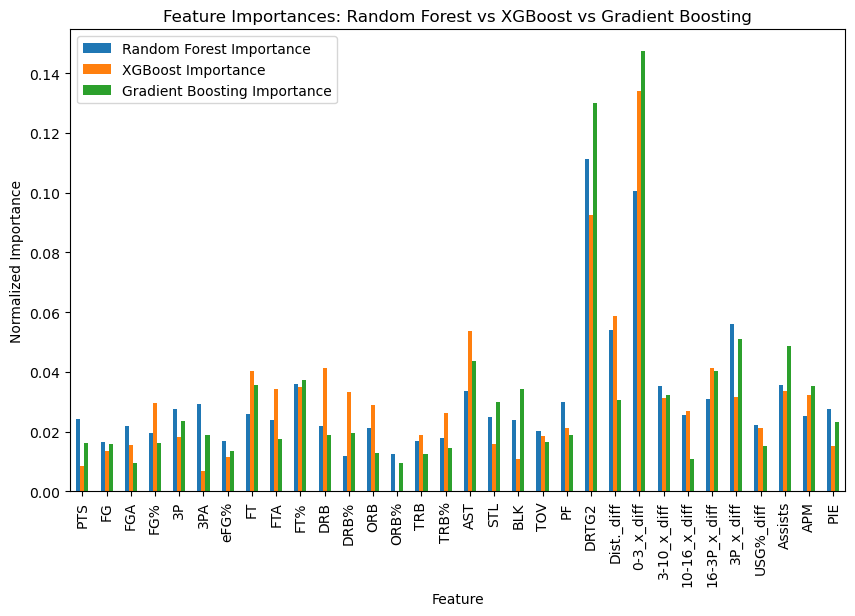

In [26]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge

features = [
    'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
    'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
    'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
    '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
    'APM', 'PIE'
]

X = alllineup_stats1[features]
y = alllineup_stats1["ORTG2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
stack_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=42)),
        ('xgb', XGBRegressor(random_state=42)),
        ('gb', GradientBoostingRegressor(random_state=42))
    ],
    final_estimator=LinearRegression()
)
stack_model.fit(X_train, y_train)
stack_preds = stack_model.predict(X_test)
print(f'Stacking R² Score: {r2_score(y_test, stack_preds)}')

rf_importance = stack_model.named_estimators_['rf'].feature_importances_
xgb_importance = stack_model.named_estimators_['xgb'].feature_importances_
gb_importance = stack_model.named_estimators_['gb'].feature_importances_

importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest Importance': rf_importance,
    'XGBoost Importance': xgb_importance,
    'Gradient Boosting Importance': gb_importance
})

importances['Random Forest Importance'] /= importances['Random Forest Importance'].sum()
importances['XGBoost Importance'] /= importances['XGBoost Importance'].sum()
importances['Gradient Boosting Importance'] /= importances['Gradient Boosting Importance'].sum()

importances.set_index('Feature', inplace=True)
importances.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances: Random Forest vs XGBoost vs Gradient Boosting")
plt.ylabel("Normalized Importance")
plt.show()


Stacking R² Score: 0.394441603522954


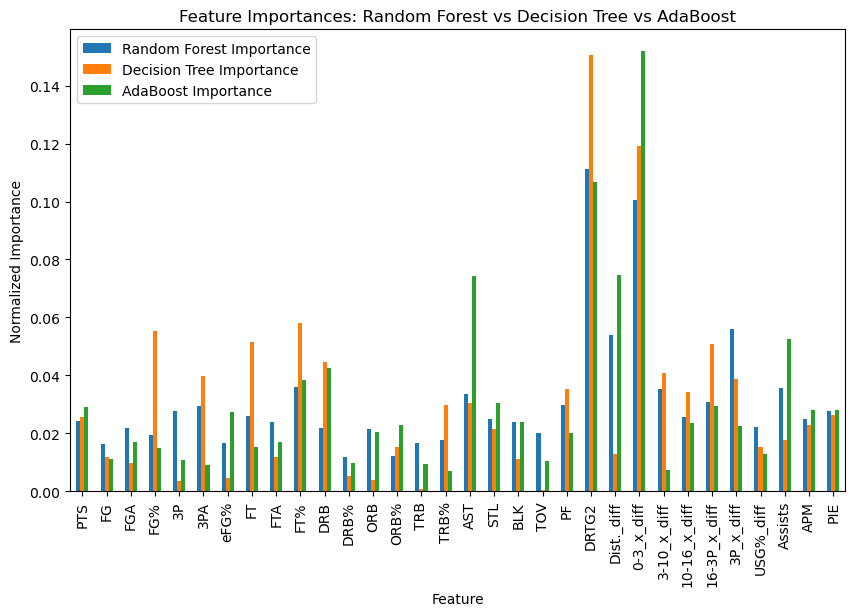

In [27]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as LGB

features = [
    'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
    'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
    'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
    '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
    'APM', 'PIE'
]

X = alllineup_stats1[features]
y = alllineup_stats1["ORTG2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
stack_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=42)),
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('svr', SVR(kernel='rbf')),
        ('ada', AdaBoostRegressor(random_state=42))
    ],
    final_estimator=Ridge()
)

stack_model.fit(X_train, y_train)
stack_preds = stack_model.predict(X_test)
print(f'Stacking R² Score: {r2_score(y_test, stack_preds)}')

rf_importance = stack_model.named_estimators_['rf'].feature_importances_
dt_importance = stack_model.named_estimators_['dt'].feature_importances_
ada_importance = stack_model.named_estimators_['ada'].feature_importances_

importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest Importance': rf_importance,
    'Decision Tree Importance': dt_importance,
    'AdaBoost Importance': ada_importance
})

importances['Random Forest Importance'] /= importances['Random Forest Importance'].sum()
importances['Decision Tree Importance'] /= importances['Decision Tree Importance'].sum()
importances['AdaBoost Importance'] /= importances['AdaBoost Importance'].sum()

importances.set_index('Feature', inplace=True)
importances.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances: Random Forest vs Decision Tree vs AdaBoost")
plt.ylabel("Normalized Importance")
plt.show()


In [183]:
from sklearn.metrics import r2_score
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR()),
    ('en', ElasticNet(random_state=42)),
    ('ada', AdaBoostRegressor(random_state=42))
]

# Load your dataset and features
features = [
    'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
    'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
    'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
    '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
    'APM', 'PIE'
]

X = alllineup_stats1[features]
y = alllineup_stats1["ORTG2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the final estimator
final_estimator = Ridge()

# Initialize a variable to store the best R² score and its corresponding model combination
best_r2_score = -float('inf')
best_combination = None

# Loop through all combinations of base models (from 1 to all models)
for n in range(1, len(base_models) + 1):
    for subset in combinations(base_models, n):
        # Convert the tuple subset into a list for the estimators parameter
        subset_list = list(subset)
        
        # Create a stacking regressor with the current subset of base models
        stack_model = StackingRegressor(
            estimators=subset_list,
            final_estimator=final_estimator
        )
        
        # Train the model
        stack_model.fit(X_train, y_train)
        
        # Make predictions and calculate the R² score
        stack_preds = stack_model.predict(X_test)
        score = r2_score(y_test, stack_preds)
        
        # Check if the current R² score is the best one
        if score > best_r2_score:
            best_r2_score = score
            best_combination = subset_list

# Output the best combination and its R² score
print(f'Best R² Score: {best_r2_score}')
print(f'Best Combination of Models: {best_combination}')


Best R² Score: 0.2893564859612233
Best Combination of Models: [('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)), ('gb', GradientBoostingRegressor(random_state=42)), ('svr', SVR()), ('en', ElasticNet(random_state=42)), ('ada', AdaBoostRegressor(random_state=42))]


Stacking R² Score: 0.05873876840322345


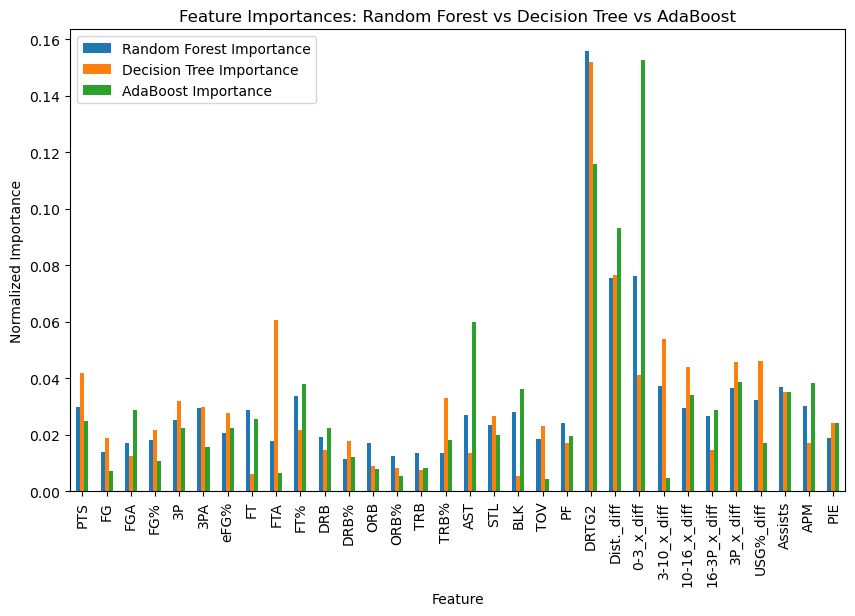

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

features = ['PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
            'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
            'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
            '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
            'APM', 'PIE'
            ]

X = alllineup_stats1[features]
y = alllineup_stats1["ORTG2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

stack_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=42)),
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('ada', AdaBoostRegressor(random_state=42))
    ],
    final_estimator=Ridge()
)

stack_model.fit(X_train, y_train)
stack_preds = stack_model.predict(X_test)
print(f'Stacking R² Score: {r2_score(y_test, stack_preds)}')

rf_importance = stack_model.named_estimators_['rf'].feature_importances_
dt_importance = stack_model.named_estimators_['dt'].feature_importances_
ada_importance = stack_model.named_estimators_['ada'].feature_importances_

importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest Importance': rf_importance,
    'Decision Tree Importance': dt_importance,
    'AdaBoost Importance': ada_importance
})

importances['Random Forest Importance'] /= importances['Random Forest Importance'].sum()
importances['Decision Tree Importance'] /= importances['Decision Tree Importance'].sum()
importances['AdaBoost Importance'] /= importances['AdaBoost Importance'].sum()

importances.set_index('Feature', inplace=True)
importances.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances: Random Forest vs Decision Tree vs AdaBoost")
plt.ylabel("Normalized Importance")
plt.show()

In [92]:
rf_importance = stack_model.named_estimators_['rf'].feature_importances_
dt_importance = stack_model.named_estimators_['dt'].feature_importances_
ada_importance = stack_model.named_estimators_['ada'].feature_importances_

rf_importance /= np.sum(rf_importance)
dt_importance /= np.sum(dt_importance)
ada_importance /= np.sum(ada_importance)

weighted_importance = (rf_importance + dt_importance + ada_importance) / 3

features = [
    'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
    'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
    'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
    '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
    'APM', 'PIE'
]
X = alllineup_stats1[features]

compatibility_scores = X.dot(weighted_importance)
alllineup_stats1["Compatibility Score"] = compatibility_scores

In [93]:
compatibility_scores = X.dot(weighted_importance)
alllineup_stats1["Compatibility Score"] = compatibility_scores
display(alllineup_stats1[["Player 1", "Player 2", "Team", "Compatibility Score"]].nlargest(10, "Compatibility Score"))

,Player 1,Player 2,Team,Compatibility Score
565,N. Alexander-Walker,R. Gobert,MIN,0.440138
210,Amen Thompson,F. VanVleet,HOU,0.427166
250,M. Conley,R. Gobert,MIN,0.400248
18,L. Doncic,D. Lively,DAL,0.386590
312,A. Caruso,A. Drummond,CHI,0.372170
94,N. Batum,J. Embiid,PHI,0.363763
2,G. Antetokounmpo,K. Middleton,MIL,0.311396
317,L. Kornet,P. Pritchard,BOS,0.301984
30,K. Durant,J. Nurkic,PHO,0.273018
161,J. Brunson,I. Hartenstein,NYK,0.266916


In [103]:
alllineup_stats1 = pd.read_csv("alllineup_stats1.csv")

In [147]:
num_rows1 = (alllineup_stats1["Position"] == "GG").sum()
num_rows2 = (alllineup_stats1["Position"] == "GF").sum()
num_rows3 = (alllineup_stats1["Position"] == "FF").sum()
num_rows4 = (alllineup_stats1["Position"] == "FC").sum()
num_rows5 = (alllineup_stats1["Position"] == "CC").sum()
num_rows6 = (alllineup_stats1["Position"] == "GC").sum()
print(num_rows1+num_rows2+num_rows3+num_rows4+num_rows5+num_rows6)

596


In [151]:
GG_stats = alllineup_stats1[alllineup_stats1["Position"]=="GG"]
GF_stats = alllineup_stats1[alllineup_stats1["Position"]=="GF"]
FF_stats = alllineup_stats1[alllineup_stats1["Position"]=="FF"]
GC_stats = alllineup_stats1[alllineup_stats1["Position"]=="GC"]
FC_stats = alllineup_stats1[(alllineup_stats1["Position"] == "FC") | (alllineup_stats1["Position"] == "CC")]

In [178]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as LGB

# Define features and target variable
features = [
    'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
    'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
    'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
    '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
    'APM', 'PIE'
]

X = GC_stats[features]
y = GC_stats["ORTG2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the stacking model
stack_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=42)),
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('svr', SVR(kernel='rbf')),
        ('ada', AdaBoostRegressor(random_state=42))
    ],
    final_estimator=Ridge()
)

# Fit the model
stack_model.fit(X_train, y_train)

# Make predictions
stack_preds = stack_model.predict(X_test)

# Print the R² score
print(f'Stacking R² Score: {r2_score(y_test, stack_preds)}')

rf_importance = stack_model.named_estimators_['rf'].feature_importances_
dt_importance = stack_model.named_estimators_['dt'].feature_importances_
ada_importance = stack_model.named_estimators_['ada'].feature_importances_

rf_importance /= np.sum(rf_importance)
dt_importance /= np.sum(dt_importance)
ada_importance /= np.sum(ada_importance)

weighted_importance = (rf_importance + dt_importance + ada_importance) / 3

features = [
    'PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', 'eFG%', 'FT', 'FTA', 'FT%',
    'DRB', 'DRB%', 'ORB', 'ORB%', 'TRB', 'TRB%', 'AST', 'STL', 'BLK', 'TOV',
    'PF', 'DRTG2', 'Dist._diff', '0-3_x_diff', '3-10_x_diff',
    '10-16_x_diff', '16-3P_x_diff', '3P_x_diff', 'USG%_diff', 'Assists',
    'APM', 'PIE'
]

compatibility_scores = X.dot(weighted_importance)
GC_stats["Compatibility Score"] = compatibility_scores

Stacking R² Score: -0.040539377315620406


/var/folders/61/bpyxxrn50vg4s9fmxmsymnl80000gn/T/ipykernel_30856/2265020674.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GC_stats["Compatibility Score"] = compatibility_scores


In [154]:
GG_stats[["Player 1", "Player 2", "Team", "Position", "Compatibility Score"]].nlargest(5, "Compatibility Score")

,Player 1,Player 2,Team,Position,Compatibility Score
408,S. Gilgeous-Alexander,I. Joe,OKC,GG,0.158054
404,S. Gilgeous-Alexander,C. Wallace,OKC,GG,0.128847
399,J. Giddey,S. Gilgeous-Alexander,OKC,GG,0.114599
311,J. Jaquez,D. Robinson,MIA,GG,0.011754
356,M. Conley,A. Edwards,MIN,GG,0.004771


In [159]:
GF_stats[["Player 1", "Player 2", "Team", "Position", "Compatibility Score"]].nlargest(5, "Compatibility Score")

,Player 1,Player 2,Team,Position,Compatibility Score
209,Amen Thompson,F. VanVleet,HOU,GF,0.398560
427,C. Anthony,J. Isaac,ORL,GF,0.294363
323,G. Antetokounmpo,D. Lillard,MIL,GF,0.167587
350,K. Anderson,A. Edwards,MIN,GF,0.132049
336,G. Antetokounmpo,M. Beasley,MIL,GF,0.097362


In [161]:
FF_stats[["Player 1", "Player 2", "Team", "Position", "Compatibility Score"]].nlargest(5, "Compatibility Score")

,Player 1,Player 2,Team,Position,Compatibility Score
343,K. Anderson,N. Reid,MIN,FF,0.365931
320,G. Antetokounmpo,K. Middleton,MIL,FF,0.346484
313,J. Butler,H. Highsmith,MIA,FF,0.219373
371,T. Murphy,Z. Williamson,NOP,FF,0.200389
28,S. Hauser,J. Tatum,BOS,FF,0.157763


In [163]:
GC_stats[["Player 1", "Player 2", "Team", "Position", "Compatibility Score"]].nlargest(5, "Compatibility Score")

,Player 1,Player 2,Team,Position,Compatibility Score
381,J. Brunson,M. Robinson,NYK,GC,0.574184
35,L. Kornet,P. Pritchard,BOS,GC,0.408385
136,L. Doncic,D. Lively,DAL,GC,0.370202
65,A. Caruso,A. Drummond,CHI,GC,0.353603
0,Bogdan Bogdanovic,C. Capela,ATL,GC,0.326845


In [165]:
FC_stats[["Player 1", "Player 2", "Team", "Position", "Compatibility Score"]].nlargest(5, "Compatibility Score")

,Player 1,Player 2,Team,Position,Compatibility Score
451,N. Batum,J. Embiid,PHI,FC,0.378852
464,K. Durant,J. Nurkic,PHO,FC,0.336507
430,J. Ingles,M. Wagner,ORL,FC,0.147142
344,K. Anderson,R. Gobert,MIN,FC,0.134692
69,D. DeRozan,A. Drummond,CHI,FC,0.134516


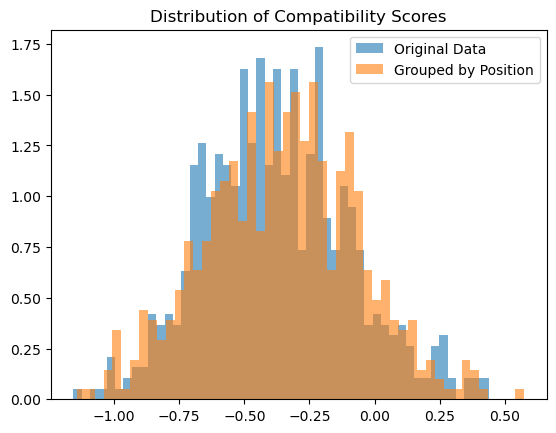

In [174]:
plt.hist(alllineup_stats1["Compatibility Score"], bins=50, alpha=0.6, label="Original Data", density=True)
plt.hist(positioned_stats["Compatibility Score"], bins=50, alpha=0.6, label="Grouped by Position", density=True)
plt.title("Distribution of Compatibility Scores")
plt.legend()
plt.show()

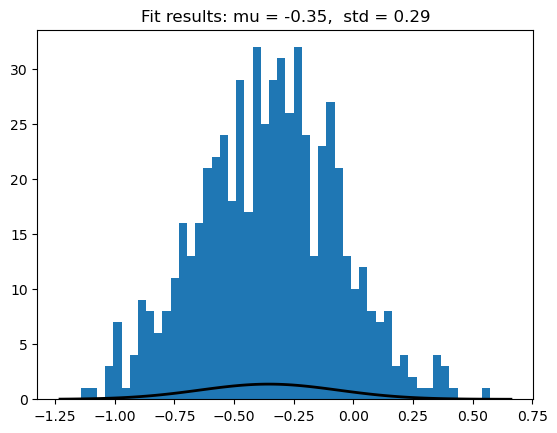

In [169]:
positioned_stats = pd.concat([FC_stats, GG_stats, GC_stats, FF_stats, GF_stats], ignore_index=True)
# plt.hist(positioned_stats["Compatibility Score"], bins=50)
# plt.title("Distribution of Compatibility Scores")
# plt.show()

import scipy.stats as stats
data = positioned_stats['Compatibility Score']

plt.hist(positioned_stats["Compatibility Score"], bins=50)
mu, std = stats.norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title(f"Fit results: mu = {mu:.2f},  std = {std:.2f}")
plt.show()



In [38]:
misc_stats = pd.read_csv("team_misc.csv")
misc_stats = misc_stats.drop(misc_stats.index[1::2])
misc_stats = misc_stats.reset_index(drop=True)
display(misc_stats.head(6))

,Team,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attendance
0,ATL,36,46,36,46,-2.18,-0.19,-2.38,117.2,119.4,...,0.539,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,"696,418"
1,BOS,64,18,66,16,11.34,-0.60,10.75,123.2,111.6,...,0.578,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,"785,396"
2,BRK,32,50,34,48,-2.89,-0.13,-3.02,113.2,116.1,...,0.531,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,"720,291"
3,CHO,21,61,18,64,-10.24,0.13,-10.12,109.3,119.8,...,0.529,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,"674,400"
4,CHI,39,43,37,45,-1.44,-0.33,-1.77,114.9,116.3,...,0.534,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,"845,620"
5,CLE,48,34,47,35,2.41,-0.44,1.98,115.2,112.7,...,0.557,12.4,23.2,0.179,0.535,12.3,76.9,0.190,Rocket Mortgage Fieldhouse,"793,167"


In [40]:
misc_stats["win_pct"] = misc_stats["W"] / (misc_stats["L"] + misc_stats["W"])
misc_stats["net_rtg"] = misc_stats["ORtg"] - misc_stats["DRtg"]
display(misc_stats.head(6))

,Team,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attendance,win_pct,net_rtg
0,ATL,36,46,36,46,-2.18,-0.19,-2.38,117.2,119.4,...,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,"696,418",0.439024,-2.2
1,BOS,64,18,66,16,11.34,-0.60,10.75,123.2,111.6,...,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,"785,396",0.780488,11.6
2,BRK,32,50,34,48,-2.89,-0.13,-3.02,113.2,116.1,...,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,"720,291",0.390244,-2.9
3,CHO,21,61,18,64,-10.24,0.13,-10.12,109.3,119.8,...,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,"674,400",0.256098,-10.5
4,CHI,39,43,37,45,-1.44,-0.33,-1.77,114.9,116.3,...,25.1,0.187,0.556,12.7,76.4,0.195,United Center,"845,620",0.475610,-1.4
5,CLE,48,34,47,35,2.41,-0.44,1.98,115.2,112.7,...,23.2,0.179,0.535,12.3,76.9,0.190,Rocket Mortgage Fieldhouse,"793,167",0.585366,2.5


In [109]:
alllineup_stats1['Rank'] = alllineup_stats1['Compatibility Score'].rank(ascending=False)
comp_rk = alllineup_stats1.groupby('Team')['Rank'].mean().reset_index()
comp_rk = average_team_rank.sort_values('Rank')
win_rk = misc_stats[["Team", "win_pct"]].sort_values("win_pct", ascending=False)

In [97]:
ranks = pd.merge(comp_rk, win_rk, on="Team", how="inner")
ranks

,Team,Rank,win_pct
0,MIN,142.176471,0.682927
1,NOP,151.352941,0.597561
2,NYK,165.388889,0.609756
3,ORL,174.176471,0.573171
4,GSW,186.529412,0.560976
5,PHO,186.823529,0.597561
6,DEN,188.466667,0.695122
7,CLE,193.142857,0.585366
8,MIA,193.388889,0.560976
9,LAC,221.266667,0.621951


In [73]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(ranks["Rank"], ranks["win_pct"])
print(f"Spearman Correlation: {corr}, P-value: {p_value}")

Spearman Correlation: -0.6792303153844599, P-value: 3.6739087809892666e-05


In [105]:
teams = alllineup_stats1["Team"].unique()
plt.bar(

array(['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

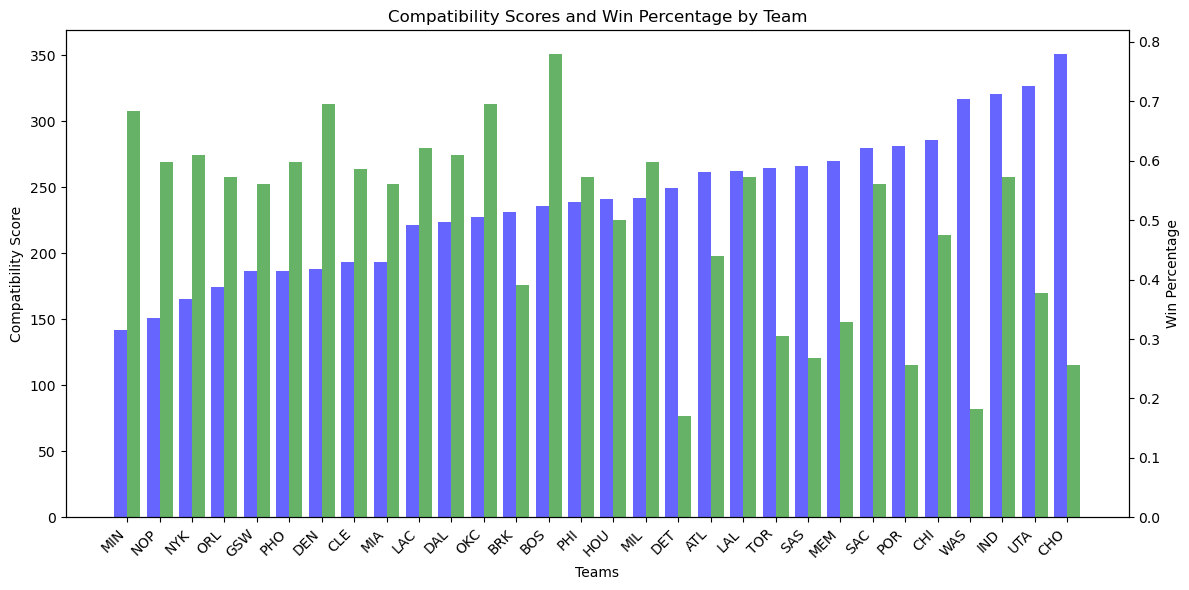

In [113]:
teams = ranks['Team']
compatibility = ranks['Rank']
win_pct = ranks['win_pct']

x = np.arange(len(teams))
width = 0.4

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for Compatibility Scores
ax1.bar(x - width/2, compatibility, width, color='blue', label='Compatibility Score', alpha=0.6)
ax1.set_xlabel('Teams')
ax1.set_ylabel('Compatibility Score')
ax1.tick_params(axis='y')
ax1.set_xticks(x)
ax1.set_xticklabels(teams, rotation=45, ha='right')

# Right y-axis for Win Percentage
ax2 = ax1.twinx()
ax2.bar(x + width/2, win_pct, width, color='green', label='Win Percentage', alpha=0.6)
ax2.set_ylabel('Win Percentage')
ax2.tick_params(axis='y')

plt.title('Compatibility Scores and Win Percentage by Team')
fig.tight_layout()
plt.show()


In [219]:
alllineup_stats = alllineup_stats1.copy()

In [240]:
alllineup_stats1[alllineup_stats["Team"] == "HOU"]

,Player 1,Player 2,Team,Position,MP,PTS,FG,FGA,FG%,3P,...,3-10_x_diff,10-16_x_diff,16-3P_x_diff,3P_x_diff,USG%_diff,Assists,APM,PIE,Compatibility Score,Rank
199,J. Tate,F. VanVleet,HOU,GF,618:26:00,1.157322,0.839088,0.985378,0.107492,1.461742,...,0.087977,-1.212308,0.069565,-0.659218,-1.075158,-1.656250,-1.208679,-0.135527,-0.018022,59.0
200,A. Sengun,J. Smith,HOU,FC,1370:51:00,-0.057799,0.053248,-0.549368,0.313516,-0.618275,...,0.979472,-1.667692,-1.408696,-0.083799,-0.706330,-0.765625,-0.810679,-0.137987,-0.218425,161.0
201,D. Brooks,J. Smith,HOU,FF,1493:04:00,-0.365630,-0.021594,-0.764771,0.395926,-0.433385,...,-0.967742,-1.273846,-1.304348,-1.854749,-1.937292,-1.546875,-1.680547,-0.002091,-0.686863,523.0
202,Jeff Green,J. Smith,HOU,FF,598:52:00,-0.754469,-1.106802,-0.387816,-1.211060,0.028841,...,-0.592375,-1.200000,-1.182609,-1.893855,-0.252591,-1.593750,-1.025557,-0.507864,-0.814734,568.0
203,J. Smith,F. VanVleet,HOU,GF,1771:43:00,0.136620,0.015827,-0.657070,0.395926,0.167509,...,-1.800587,-1.150769,-0.921739,-1.329609,-1.924103,-0.343750,-0.779609,1.138887,-0.361438,271.0
204,D. Brooks,Amen Thompson,HOU,FF,651:34:00,0.169024,0.464879,-0.064711,0.437130,-0.525830,...,-1.730205,-1.643077,-1.773913,-0.033520,-0.793579,-1.671875,-1.293508,-1.084943,-0.211695,157.0
205,Jalen Green,A. Sengun,HOU,GC,1633:53:00,0.169024,0.128090,-0.926323,0.684359,-0.433385,...,0.674487,-1.372308,-0.973913,-0.094972,-1.838013,0.281250,-0.107129,0.842028,-0.157984,124.0
206,Jalen Green,Jeff Green,HOU,GF,618:14:00,-0.236017,-0.545488,-0.199338,-0.675398,1.045738,...,-0.897361,-1.840000,-0.747826,-1.905028,-1.712414,-1.796875,-1.537241,-0.002232,-0.838416,574.0
207,D. Brooks,Jalen Green,HOU,GF,1736:29:00,-0.009194,0.202932,-0.549368,0.519540,-0.479607,...,-1.272727,-1.766154,-0.869565,-1.843575,-0.607051,-1.187500,-1.453432,-0.413177,-0.671657,511.0
208,Jalen Green,J. Smith,HOU,GF,1741:10:00,-0.317025,-0.320962,-0.441667,-0.180941,-0.387162,...,-1.695015,-1.040000,-1.565217,-1.988827,-0.542260,-1.171875,-1.442451,0.241513,-0.699243,534.0


In [244]:
alllineup_stats.nlargest(10, "Compatibility Score")

,Player 1,Player 2,Team,Position,MP,PTS,FG,FGA,FG%,3P,...,3-10_x_diff,10-16_x_diff,16-3P_x_diff,3P_x_diff,USG%_diff,Assists,APM,PIE,Compatibility Score,Rank
352,N. Alexander-Walker,R. Gobert,MIN,GC,1064:49:00,92.871867,88.249078,37.704034,92.581153,68.731487,...,14.662757,5.230769,10.434783,86.312849,21.661597,8.593750,9.446070,33.003996,0.440138,1.0
209,Amen Thompson,F. VanVleet,HOU,GF,629:03:00,99.185085,90.623224,77.326989,74.319808,87.699108,...,37.536657,5.846154,38.695652,62.290503,33.729820,14.062500,31.936737,50.347531,0.427166,2.0
351,M. Conley,R. Gobert,MIN,GC,1805:05:00,63.287324,51.231179,31.704758,61.110480,56.222997,...,9.970674,18.769231,10.000000,87.150838,12.483342,41.015625,29.542792,65.331124,0.400248,3.0
136,L. Doncic,D. Lively,DAL,GC,1075:59:00,66.515074,59.737923,34.836895,66.646062,50.378274,...,11.143695,43.692308,34.347826,61.871508,48.635469,46.093750,59.688562,69.765519,0.386590,4.0
65,A. Caruso,A. Drummond,CHI,GC,627:49:00,87.578559,74.633422,61.466476,63.089256,34.261499,...,42.521994,0.307692,13.478261,85.195531,88.384825,11.718750,26.611378,55.243625,0.372170,5.0
451,N. Batum,J. Embiid,PHI,FC,633:13:00,90.371265,90.437440,18.340968,94.988258,81.250630,...,43.695015,66.153846,71.304348,77.513966,100.000000,18.750000,42.397798,77.798459,0.363763,6.0
320,G. Antetokounmpo,K. Middleton,MIL,FF,1042:23:00,82.422841,84.949430,45.857122,81.935974,50.033295,...,26.979472,36.615385,42.608696,40.921788,6.188105,67.187500,91.028366,70.479213,0.311396,7.0
35,L. Kornet,P. Pritchard,BOS,GC,726:42:00,71.868279,77.288158,87.573880,33.221945,61.295786,...,27.859238,22.461538,28.695652,83.379888,8.206109,13.671875,26.212967,54.288171,0.301984,8.0
464,K. Durant,J. Nurkic,PHO,FC,1654:07:00,70.207821,68.946296,61.368313,60.227694,59.877854,...,46.334311,76.615385,64.782609,19.413408,13.243343,68.359375,56.585242,55.709456,0.273018,9.0
385,J. Brunson,I. Hartenstein,NYK,GC,1333:12:00,80.729105,83.867350,46.634897,82.198583,63.969048,...,4.398827,32.000000,36.956522,43.435754,53.726850,35.156250,35.370375,65.093458,0.266916,10.0


In [247]:
alllineup_stats[["Rank", "Player 1", "Player 2", "Team", "Compatibility Score"]].nlargest(10, "Compatibility Score")

,Rank,Player 1,Player 2,Team,Compatibility Score
352,1.0,N. Alexander-Walker,R. Gobert,MIN,0.440138
209,2.0,Amen Thompson,F. VanVleet,HOU,0.427166
351,3.0,M. Conley,R. Gobert,MIN,0.400248
136,4.0,L. Doncic,D. Lively,DAL,0.386590
65,5.0,A. Caruso,A. Drummond,CHI,0.372170
451,6.0,N. Batum,J. Embiid,PHI,0.363763
320,7.0,G. Antetokounmpo,K. Middleton,MIL,0.311396
35,8.0,L. Kornet,P. Pritchard,BOS,0.301984
464,9.0,K. Durant,J. Nurkic,PHO,0.273018
385,10.0,J. Brunson,I. Hartenstein,NYK,0.266916


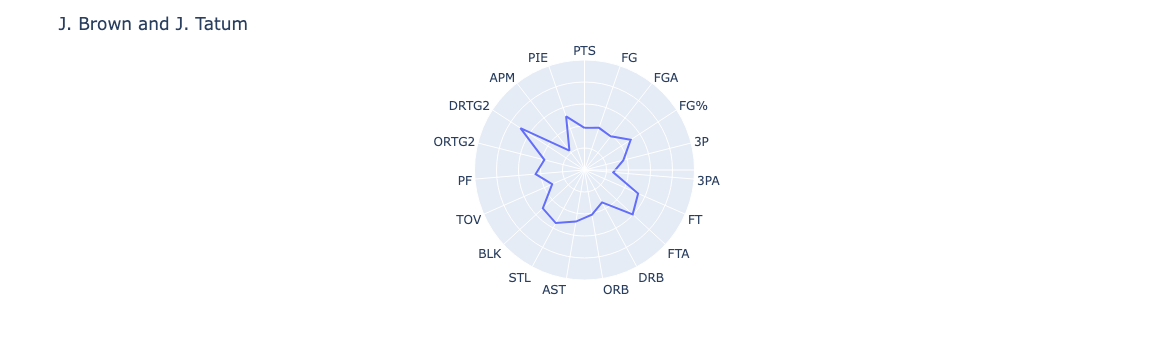

In [231]:
import plotly.express as px

def spider(p1, p2):
    players = alllineup_stats[(alllineup_stats["Player 1"]==p1) & (alllineup_stats["Player 2"]==p2)]
    selected = [5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 21, 22, 23, 24, 25, 26, 27, 36, 37]
    players_selected = players.iloc[0, selected]
    players = pd.DataFrame(dict(
        stat=players.columns[selected].tolist(), 
        value=players_selected.tolist() 
    ))

    fig = px.line_polar(jb_jt, r='value', theta='stat', line_close=True)
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                range=[0, 100],
                showticklabels=False
            )
        ),
        title=f"{p1} and {p2}"
    )
    fig.show()
spider("J. Brown", "J. Tatum")

In [32]:
import pandas as pd

det24 = pd.read_csv("detroit_lineup_stats_2024.csv")
det25 = pd.read_csv("detroit_lineup_stats_2025.csv")

In [47]:
det24['Player 1'] = det24['Player 1'].astype(str)
det24['Player 2'] = det24['Player 2'].astype(str)
det25['Player 1'] = det25['Player 1'].astype(str)
det25['Player 2'] = det25['Player 2'].astype(str)
det24[['Player 1', 'Player 2']] = det24.apply(lambda row: pd.Series(sorted([row['Player 1'], row['Player 2']])), axis=1)
det25[['Player 1', 'Player 2']] = det25.apply(lambda row: pd.Series(sorted([row['Player 1'], row['Player 2']])), axis=1)
det24['Lineup'] = det24['Player 1'] + ' | ' + det24['Player 2']
det25['Lineup'] = det25['Player 1'] + ' | ' + det25['Player 2']
common_lineups = pd.merge(det24, det25, on='Lineup', how='inner')
common_lineups = common_lineups.drop(common_lineups.index[-1])
det24_common_lineups = det24[det24['Lineup'].isin(common_lineups['Lineup'])]
det25_common_lineups = det25[det25['Lineup'].isin(common_lineups['Lineup'])]
det25_common_lineups.iloc[[1, 2]] = det25_common_lineups.iloc[[2, 1]].values

display(det24_common_lineups[["Player 1", "Player 2", "PTS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB%", "DRB%", "AST", "STL", "BLK", "TOV", "PF"]])
display(det25_common_lineups[["Player 1", "Player 2", "PTS", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB%", "DRB%", "AST", "STL", "BLK", "TOV", "PF"]])


,Player 1,Player 2,PTS,FG,FGA,3P,3PA,FT,FTA,ORB%,DRB%,AST,STL,BLK,TOV,PF
2,C. Cunningham,J. Duren,-5.3,0.2,0.3,-1.8,-0.014,-3.9,-3.2,6.5,6.5,-0.3,-2.8,-0.8,4.5,2.0
3,C. Cunningham,I. Stewart,-3.4,0.4,-0.8,-0.6,0.001,-3.5,-3.6,5.6,5.6,0.8,-2.8,-0.6,5.1,2.4
4,A. Thompson,C. Cunningham,-7.5,0.0,1.5,-3.0,-0.046,-4.5,-4.0,6.9,6.9,-0.9,-2.6,-0.7,3.6,2.5
9,A. Thompson,J. Duren,-4.5,1.9,2.2,-3.0,-0.037,-5.3,-4.6,8.4,8.4,-0.1,-3.3,-0.1,3.4,2.6


,Player 1,Player 2,PTS,FG,FGA,3P,3PA,FT,FTA,ORB%,DRB%,AST,STL,BLK,TOV,PF
3,C. Cunningham,J. Duren,4.7,4.1,2.5,-2.9,-0.004,-0.6,-1.2,6.3,6.3,1.8,-1.7,0.1,0.8,0.7
11,C. Cunningham,I. Stewart,0.8,0.7,-1.4,0.2,0.007,-0.8,-1.7,0.3,0.3,1.1,-2.5,0.2,1.8,1.5
16,A. Thompson,C. Cunningham,4.8,5.3,5.7,-4.7,-0.043,-1.1,-2.9,8.1,8.1,1.7,0.6,-0.8,-1.0,1.0
17,A. Thompson,J. Duren,6.5,5.4,5.1,-4.1,-0.015,-0.3,-1.4,8.8,8.8,1.9,0.2,-0.6,-0.3,0.6


In [2]:
from nba_api.stats.static import players
import pandas as pd

alllineup_stats = pd.read_csv("alllineup_stats.csv")
player_names = pd.read_csv("player_names.csv")
player_names = player_names["Unnamed: 3"]
all_players = players.get_players()
players_dict = {player['full_name']: player['id'] for player in all_players}

players_dict['Bogdan Bogdanovic'] = 203992
players_dict['Kristaps Porzingis'] = 204001
players_dict['Nikola Vucevic'] = 202696
players_dict['Vasilije Micic'] = 203995
players_dict['Luka Doncic'] = 1629029
players_dict['Dante Exum'] = 203957
players_dict['Nikola Jokic'] = 203999
players_dict['Bojan Bogdanovic'] = 202711
players_dict['Jonas Valanciunas'] = 202685
players_dict['Dennis Schroder'] = 203471
players_dict['Jusuf Nurkic'] = 203994
players_dict['Nikola Jovic'] = 1631107

import unicodedata
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])
player_ids = {name: players_dict.get(remove_accents(name)) for name in player_names}

In [56]:
season_stats.columns

Index(['Player_Name', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN',
       'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [89]:
team_misc = pd.read_csv("team_misc.csv")
team_misc = team_misc.iloc[::2]
pace = team_misc[["Team", "Pace"]]

In [98]:
alllineup_stats = pd.read_csv("alllineup_stats.csv")
alllineup_stats.shape

(596, 41)

In [148]:
from sklearn.metrics import pairwise_distances

columns = ['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
distance_matrix = pairwise_distances(season_stats1[columns])
distance_df = pd.DataFrame(distance_matrix, columns=season_stats1["Player_Name"], index=season_stats1["Player_Name"])
display(distance_df)
distance_df.to_csv("distance.csv")

Player_Name,Bogdan Bogdanovic,Dejounte Murray,Saddiq Bey,Jalen Johnson,Clint Capela,De'Andre Hunter,Al Horford,Jaylen Brown,Jrue Holiday,Sam Hauser,...,Jabari Walker,Duop Reath,Domantas Sabonis,Victor Wembanyama,Cedi Osman,Kelly Olynyk,Kelly Olynyk,Collin Sexton,Jordan Poole,Landry Shamet
Player_Name,,,,,,,,,,,,,,,,,,,,,
Bogdan Bogdanovic,0.000000,8.063897,12.219135,13.734680,24.053129,6.914149,18.463688,11.566112,13.283884,10.933340,...,19.027687,7.997829,22.411835,20.290450,12.881489,18.818685,14.097353,12.745823,4.293714,8.454268
Dejounte Murray,8.063897,0.000000,16.467995,14.228066,23.904953,10.883994,22.196440,6.227303,16.691966,17.316869,...,21.069232,11.350671,19.148049,15.552123,17.850970,19.997604,14.562563,8.192871,6.611880,14.749320
Saddiq Bey,12.219135,16.467995,0.000000,8.844418,15.835421,8.182068,9.646175,19.188117,7.614717,8.586314,...,9.146011,8.863584,18.919967,23.477896,6.911105,12.133062,10.260063,19.903540,14.210327,8.361753
Jalen Johnson,13.734680,14.228066,8.844418,0.000000,12.198708,10.161631,10.683395,16.646447,8.968958,12.586610,...,7.849084,8.987358,11.974279,18.463155,10.552595,9.634115,7.251763,18.803270,14.780294,12.958631
Clint Capela,24.053129,23.904953,15.835421,12.198708,0.000000,19.818921,16.012513,24.458385,17.907133,21.524052,...,8.904838,17.167318,12.238975,22.054509,19.371909,14.622878,14.817883,26.861344,25.050363,22.460116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kelly Olynyk,18.818685,19.997604,12.133062,9.634115,14.622878,15.235546,10.004196,23.298584,9.190982,15.899624,...,9.651448,14.855171,13.581656,24.850476,11.228832,0.000000,6.676749,22.905910,19.145510,15.361479
Kelly Olynyk,14.097353,14.562563,10.260063,7.251763,14.817883,10.246778,12.907803,17.226409,9.267927,14.741006,...,10.494343,10.279072,12.640277,20.267867,10.884469,6.676749,0.000000,16.837883,13.846842,12.285428
Collin Sexton,12.745823,8.192871,19.903540,18.803270,26.861344,13.362141,26.889094,7.658944,21.133597,22.451814,...,24.557557,15.621223,21.694587,17.596425,21.917662,22.905910,16.837883,0.000000,10.193276,18.017221


In [163]:
pd.concat([alllineup_stats["Player 1"], alllineup_stats["Player 2"]]).unique()

array(['Bogdan Bogdanovic', 'D. Murray', 'S. Bey', 'J. Johnson',
       'C. Capela', 'D. Hunter', 'A. Horford', 'J. Brown', 'J. Holiday',
       'S. Hauser', 'P. Pritchard', 'J. Tatum', 'K. Porzingis',
       'L. Kornet', 'Mikal Bridges', 'S. Dinwiddie', "R. O'Neale",
       'N. Claxton', 'C. Johnson', 'D. Finney-Smith', 'C. White',
       'D. DeRozan', 'A. Dosunmu', 'A. Drummond', 'A. Caruso',
       'N. Vucevic', 'Z. LaVine', 'T. Craig', 'G. Hayward', 'B. Miller',
       'Miles Bridges', 'T. Rozier', 'V. Micic', 'Cody Martin',
       'Tre Mann', 'I. Okoro', 'C. LeVert', 'D. Garland', 'J. Allen',
       'G. Niang', 'Donovan Mitchell', 'E. Mobley', 'L. Doncic',
       'K. Irving', 'T. Hardaway', 'D. Exum', 'Josh Green', 'D. Jones',
       'N. Jokic', 'A. Gordon', 'K. Caldwell-Pope', 'C. Braun',
       'J. Murray', 'R. Jackson', 'J. Duren', 'I. Stewart',
       'C. Cunningham', 'J. Ivey', 'M. Sasser', 'Bojan Bogdanovic',
       'K. Hayes', 'S. Curry', 'K. Thompson', 'J. Kuminga', 'C. Pa

In [164]:
season_stats1.to_csv("season_stats.csv")

In [146]:
from sklearn.metrics import pairwise_distances

columns = ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
distance_matrix = pairwise_distances(season_stats1[columns])
distance_df = pd.DataFrame(distance_matrix, columns=season_stats1["Player_Name"], index=season_stats1["Player_Name"])
display(distance_df)
distance_df.to_csv("distance.csv")

Player_Name,Bogdan Bogdanovic,Dejounte Murray,Saddiq Bey,Jalen Johnson,Clint Capela,De'Andre Hunter,Al Horford,Jaylen Brown,Jrue Holiday,Sam Hauser,...,Jabari Walker,Duop Reath,Domantas Sabonis,Victor Wembanyama,Cedi Osman,Kelly Olynyk,Kelly Olynyk,Collin Sexton,Jordan Poole,Landry Shamet
Player_Name,,,,,,,,,,,,,,,,,,,,,
Bogdan Bogdanovic,0.000000,7.224403,10.313293,13.176003,23.454495,6.808213,15.066897,8.962201,10.712244,8.845081,...,17.217456,7.851259,22.411027,18.776849,9.828159,17.302027,13.691191,10.466066,4.275730,6.333803
Dejounte Murray,7.224403,0.000000,12.979364,12.115577,22.180222,9.774168,17.014237,4.987595,12.157002,14.131152,...,17.533634,10.137049,18.772675,14.999972,13.297325,16.710913,12.801398,7.313882,5.791475,11.542431
Saddiq Bey,10.313293,12.979364,0.000000,8.429970,15.788338,6.192847,8.722475,13.265152,7.502507,8.585383,...,9.014225,7.298806,17.817976,18.664204,6.679554,12.103362,9.750391,14.316068,12.397214,8.307231
Jalen Johnson,13.176003,12.115577,8.429970,0.000000,12.111567,9.804113,8.244120,12.325528,8.038458,12.325741,...,6.616407,8.673793,11.392489,14.390576,9.568588,8.966423,7.233249,15.139323,14.150063,12.843659
Clint Capela,23.454495,22.180222,15.788338,12.111567,0.000000,19.384423,15.096095,20.936551,17.728556,21.496241,...,8.463955,16.739481,11.106155,17.799219,19.139116,14.475816,14.685898,23.718919,24.387288,22.458530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kelly Olynyk,17.302027,16.710913,12.103362,8.966423,14.475816,13.918813,9.454447,18.065403,9.179763,15.869711,...,9.626132,13.643031,11.509125,19.743330,11.190624,0.000000,5.314261,17.586824,17.487208,15.255449
Kelly Olynyk,13.691191,12.801398,9.750391,7.233249,14.685898,10.017850,10.636555,13.523450,8.104362,14.418388,...,9.362598,10.113879,12.236529,16.991150,9.684808,5.314261,0.000000,13.054976,13.328787,12.079450
Collin Sexton,10.466066,7.313882,14.316068,15.139323,23.718919,10.326384,20.023503,7.658856,14.755097,17.786589,...,19.149318,12.907658,20.369885,17.591523,15.394054,17.586824,13.054976,0.000000,7.519493,12.604548


In [134]:
distance_df.columns.unique()

Index(['Bogdan Bogdanovic', 'Dejounte Murray', 'Saddiq Bey', 'Jalen Johnson',
       'Clint Capela', 'De'Andre Hunter', 'Al Horford', 'Jaylen Brown',
       'Jrue Holiday', 'Sam Hauser',
       ...
       'Shaedon Sharpe', 'Jabari Walker', 'Duop Reath', 'Domantas Sabonis',
       'Victor Wembanyama', 'Cedi Osman', 'Kelly Olynyk', 'Collin Sexton',
       'Jordan Poole', 'Landry Shamet'],
      dtype='object', name='Player_Name', length=246)

In [130]:
def similarity(name):
    row = distance_df.loc[name]
    max_similar = row.nsmallest(5)
    return max_similar

In [149]:
similarity("Desmond Bane")

Player_Name
Desmond Bane       0.000000
Anfernee Simons    2.595277
Kyrie Irving       3.757389
Tyrese Maxey       3.881986
Paul George        4.376686
Name: Desmond Bane, dtype: float64

In [147]:
similarity("Desmond Bane")

Player_Name
Desmond Bane       0.000000
Anfernee Simons    2.222960
Kyrie Irving       3.505208
Tyrese Maxey       3.872360
De'Aaron Fox       4.028616
Name: Desmond Bane, dtype: float64

In [144]:
pd.DataFrame(similarity("Desmond Bane"))

,Desmond Bane
Player_Name,
Desmond Bane,0.000000
Anfernee Simons,2.595277
Kyrie Irving,3.757389
Tyrese Maxey,3.881986
Paul George,4.376686


In [53]:
season_stats.drop(["PLAYER_ID", "SEASON_ID", "LEAGUE_ID", "TEAM_ID"], axis=1, inplace=True)
season_stats

,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,Player_Name
0,ATL,31.0,79,33,2401.0,471,1100,0.428,240,641,...,53,219,272,247,96,26,112,179,1333,Bogdan Bogdanovic
1,ATL,27.0,78,78,2783.0,672,1463,0.459,201,554,...,62,354,416,502,111,24,201,138,1753,Dejounte Murray
2,ATL,25.0,63,51,2062.0,290,697,0.416,113,358,...,167,244,411,92,51,11,54,88,863,Saddiq Bey
3,ATL,22.0,56,52,1889.0,359,702,0.511,71,200,...,74,414,488,203,67,47,101,133,896,Jalen Johnson
4,ATL,30.0,73,73,1883.0,353,618,0.571,0,1,...,335,441,776,91,43,106,74,164,836,Clint Capela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,TOR,33.0,28,19,739.0,131,239,0.548,24,71,...,45,112,157,128,37,18,71,98,356,Kelly Olynyk
317,TOT,33.0,78,27,1759.0,276,497,0.555,60,155,...,108,303,411,347,74,30,152,230,762,Kelly Olynyk
318,UTA,25.0,78,51,2075.0,506,1038,0.487,128,325,...,71,134,205,383,62,18,165,154,1458,Collin Sexton
319,WAS,25.0,78,66,2346.0,490,1186,0.413,184,564,...,32,180,212,343,86,25,188,244,1356,Jordan Poole


In [51]:
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

# season_stats = pd.DataFrame()
player_ids_list = list(player_ids.items())[202:]
for player_name, player_id in player_ids_list:
    try:
        career = playercareerstats.PlayerCareerStats(player_id=player_id)
        career_df = career.get_data_frames()[0]
        season_2023_24 = career_df[career_df["SEASON_ID"] == "2023-24"].copy()
        if not season_2023_24.empty:
            season_2023_24['Player_Name'] = player_name 
            season_stats = pd.concat([season_stats, season_2023_24], ignore_index=True)
    except Exception as e:
        print(f"Error fetching stats for {player_name} (ID: {player_id}): {e}")